In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
df = pd.read_csv('/content/drive/MyDrive/100 Data Science/Day 8 - Emotion Detector/Emotion_classify_Data.csv')

In [42]:
df.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [44]:
df.shape

(5937, 2)

In [45]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [46]:
df.Emotion.value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

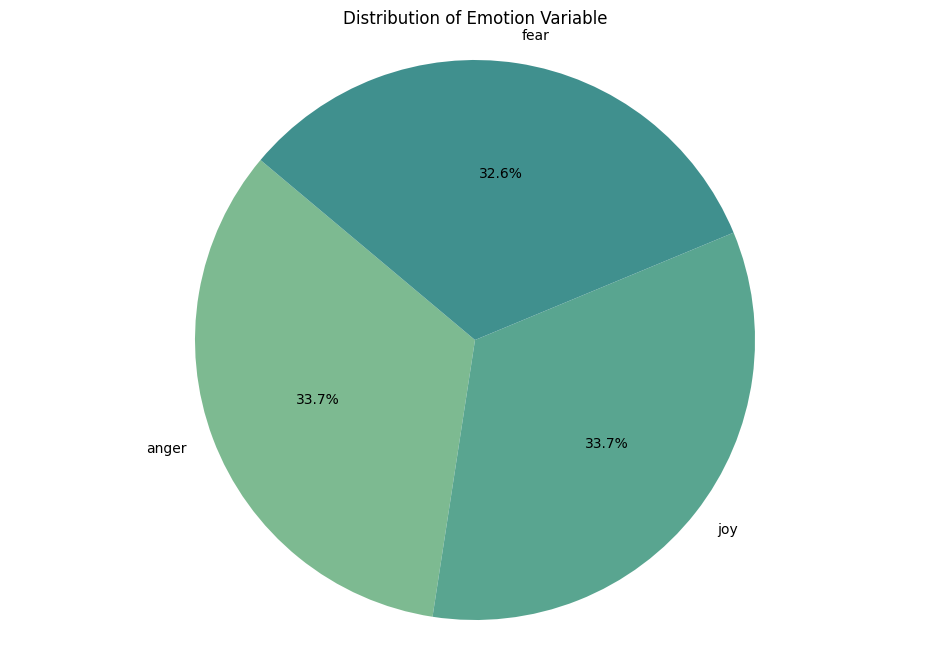

In [47]:
data = df['Emotion'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)

# Customize the plot (optional)
plt.title("Distribution of Emotion Variable")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Show the plot
plt.show()

In [48]:
df['ch_no']=df['Comment'].apply(len)
df['wd_no']=df.apply(lambda row: nltk.word_tokenize(row["Comment"]), axis=1).apply(len)
df['sn_no']=df.apply(lambda row: nltk.sent_tokenize(row["Comment"]), axis=1).apply(len)

In [49]:
df.head(5)

,Comment,Emotion,ch_no,wd_no,sn_no
0,i seriously hate one subject to death but now ...,fear,73,15,1
1,im so full of life i feel appalled,anger,34,8,1
2,i sit here to write i start to dig out my feel...,fear,131,29,1
3,ive been really angry with r and i feel like a...,joy,89,19,1
4,i feel suspicious if there is no one outside l...,fear,87,16,1


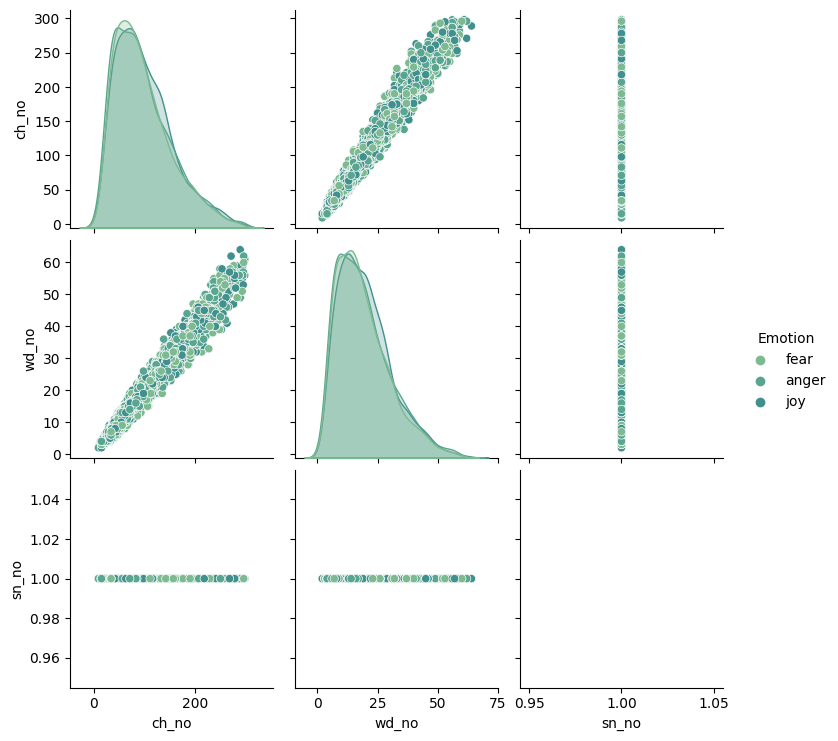

In [50]:
# Set a colorful palette
sns.set_palette("crest")

# Create a pair plot with hue as target
sns.pairplot(df, hue='Emotion')
plt.show()

In [51]:
df["Comment"] = df["Comment"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["Comment"] = df["Comment"].str.replace('[^\w\s]','')
df["Comment"] = df["Comment"].str.replace('\d','')


<ipython-input-51-82da8d37f7bd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Comment"] = df["Comment"].str.replace('[^\w\s]','')
<ipython-input-51-82da8d37f7bd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Comment"] = df["Comment"].str.replace('\d','')


In [52]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
import re, string, unicodedata

In [54]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

In [55]:
df["Comment"] = df["Comment"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [56]:
alpha = []
for i in df.Comment:
    for j in i.split():
        alpha.append(j.strip())

In [57]:
from collections import Counter

In [58]:
counter = Counter(alpha)
common_words = counter.most_common(25)
dict(common_words)

{'feel': 4047,
 'feeling': 1964,
 'like': 992,
 'im': 943,
 'little': 326,
 'really': 323,
 'know': 315,
 'time': 294,
 'get': 292,
 'want': 267,
 'people': 265,
 'bit': 220,
 'would': 220,
 'think': 216,
 'even': 214,
 'one': 210,
 'still': 207,
 'ive': 199,
 'way': 198,
 'going': 194,
 'something': 193,
 'things': 187,
 'dont': 186,
 'could': 186,
 'make': 183}

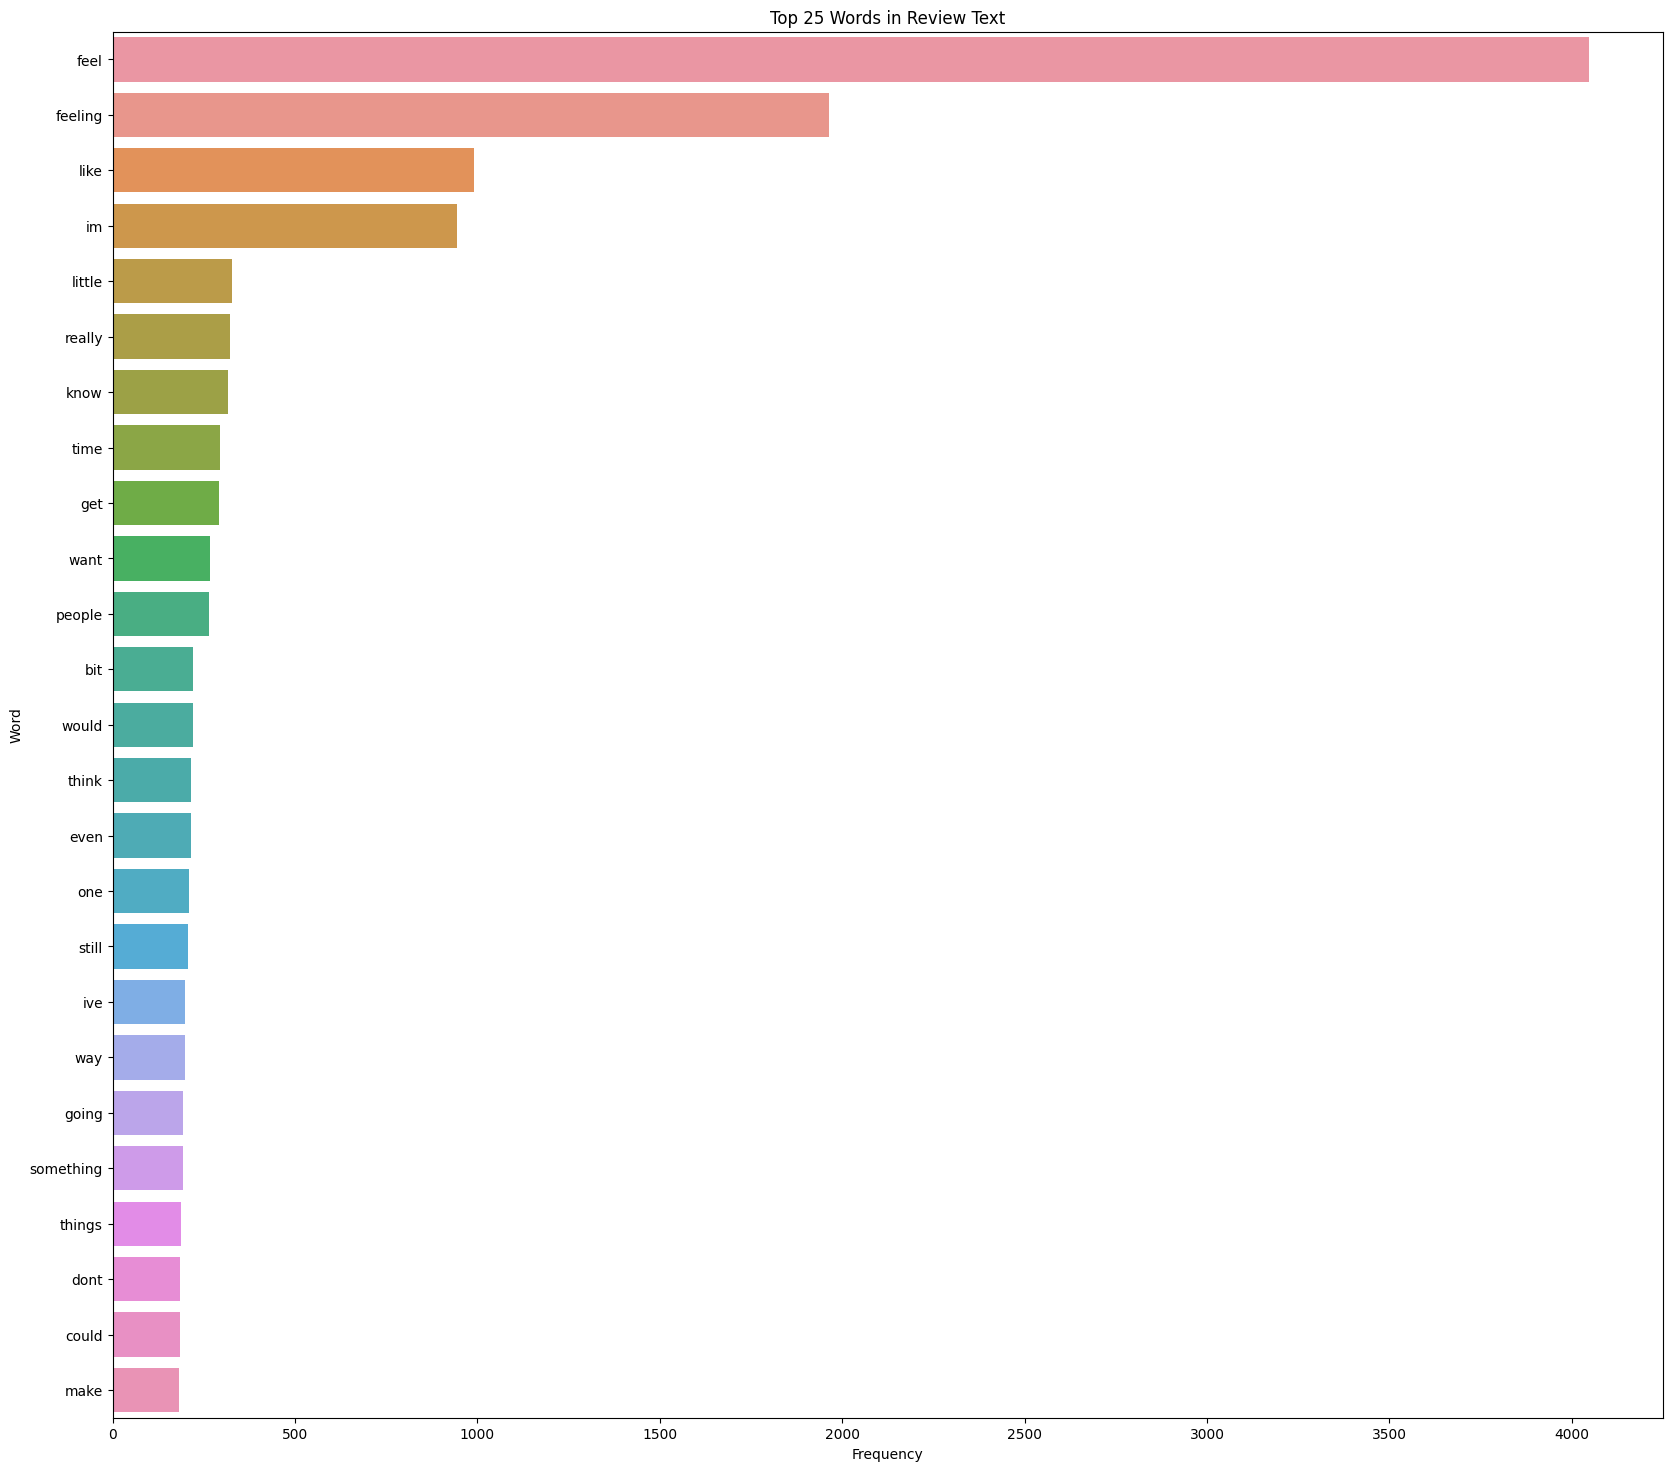

In [59]:
plt.figure(figsize=(20, 18))
sns.barplot(x=[freq for word, freq in common_words],
            y=[word for word, freq in common_words])
plt.title('Top 25 Words in Review Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [60]:
from wordcloud import WordCloud,STOPWORDS

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Emotion"]=encoder.fit_transform(df["Emotion"])


In [62]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
stemmer.stem("playing")

'play'

In [63]:

def transformed_text(Comment):
    # Convert text to lowercase
    Comment = Comment.lower()

    # Tokenize the text
    words = nltk.word_tokenize(Comment)

    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()

    # Removing English stopwords and applying stemming while ignoring special symbols
    filtered_words = [stemmer.stem(word) for word in words if word not in stopwords.words('english') and word.isalnum()]

    # Join the filtered words back into a single string
    transformed_text = ' '.join(filtered_words)

    return transformed_text

In [64]:
df["final_data"]=df["Comment"].apply(transformed_text)

In [65]:
df.head(5)

,Comment,Emotion,ch_no,wd_no,sn_no,final_data
0,seriously hate one subject death feel reluctan...,1,73,15,1,serious hate one subject death feel reluct drop
1,im full life feel appalled,0,34,8,1,im full life feel appal
2,sit write start dig feelings think afraid acce...,1,131,29,1,sit write start dig feel think afraid accept p...
3,ive really angry r feel like idiot trusting fi...,2,89,19,1,ive realli angri r feel like idiot trust first...
4,feel suspicious one outside like rapture happe...,1,87,16,1,feel suspici one outsid like raptur happen someth


In [66]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

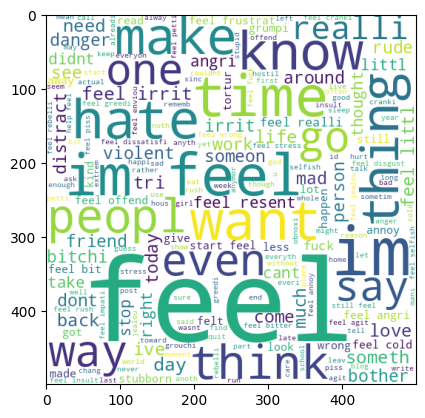

In [67]:
anger_wc=wc.generate(df[df["Emotion"]==0]["final_data"].str.cat(sep=" "))
plt.imshow(anger_wc)

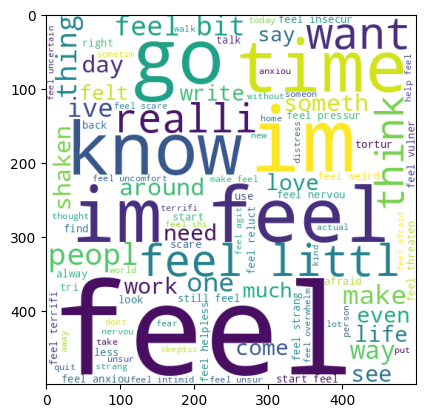

In [68]:
fear_wc=wc.generate(df[df["Emotion"]==1]["final_data"].str.cat(sep=" "))
plt.imshow(fear_wc)

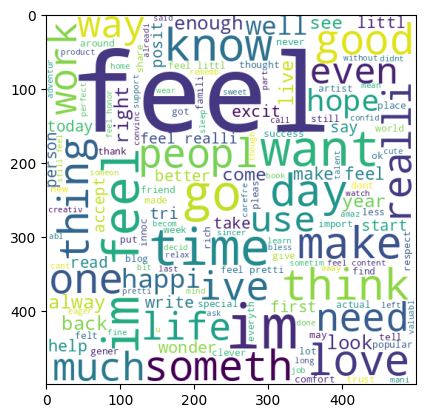

In [69]:
joy_wc=wc.generate(df[df["Emotion"]==2]["final_data"].str.cat(sep=" "))
plt.imshow(joy_wc)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer #importing countvector
cvector=CountVectorizer()
x=cvector.fit_transform(df["final_data"]).toarray() #applying vectorization to data
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
y=df["Emotion"].values
y

array([1, 0, 1, ..., 2, 1, 0])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [76]:

from sklearn.metrics import accuracy_score,precision_score #imprting classification metrics
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn.svm import SVC #importing Support vector classifier
from sklearn.tree import DecisionTreeClassifier #importing Decision tree classifier
from sklearn.ensemble import RandomForestClassifier #importing Random forest
from sklearn.naive_bayes import MultinomialNB   #importing multinomial naive bayes
from sklearn.neighbors import KNeighborsClassifier  #importing KNN
from sklearn.ensemble import AdaBoostClassifier #importing Adaboost classifier
from sklearn.ensemble import BaggingClassifier  #importing bagging classifier
from sklearn.ensemble import GradientBoostingClassifier #importing GB classifier
from xgboost import XGBClassifier   #importing XGB classifier

In [77]:
log_reg=LogisticRegression()    #assigning model
log_reg.fit(x_train,y_train)    #model training
y_log_pred=log_reg.predict(x_test)  #predicting on test data
yt_log_pred=log_reg.predict(x_train)    #predicting on train data
log_reg_acc=accuracy_score(y_test,y_log_pred)   #accuracy on test data
log_reg_prec=precision_score(y_test,y_log_pred,average='macro') #precision on test data

tr_log_reg_acc=accuracy_score(y_train,yt_log_pred)  #accuracy on test data
tr_log_reg_prec=precision_score(y_train,yt_log_pred,average='macro') #precision on test data

#printing accuracy and precision
print("accuracy score on train data is ",tr_log_reg_acc)
print("precision score on train data is ",tr_log_reg_prec)
print("accuracy score on test data is ",log_reg_acc)
print("precision score on test data is ",log_reg_prec)

accuracy score on train data is  0.9921383647798742
precision score on train data is  0.9921461659671778
accuracy score on test data is  0.9185185185185185
precision score on test data is  0.9186521639623885


In [78]:
sv=SVC()   #assigning model
sv.fit(x_train,y_train) #model training
sv_pred=sv.predict(x_test)  #predicting on test data
svt_pred=sv.predict(x_train)    #predicting on train data
sv_acc=accuracy_score(y_test,sv_pred)   #accuracy score on test data
sv_prec=precision_score(y_test,sv_pred,average='macro') #precision on test data
svt_acc=accuracy_score(y_train,svt_pred)    #accuracy on train data
svt_prec=precision_score(y_train,svt_pred,average='macro')  #precision on train data

#printing accuracy and precision
print("accuracy score on train datais ",svt_acc)
print("precision score on train data is ",svt_prec)
print("accuracy score on test data is ",sv_acc)
print("precision score on test data is ",sv_prec)

accuracy score on train datais  0.9896675651392632
precision score on train data is  0.9898841832398461
accuracy score on test data is  0.8922558922558923
precision score on test data is  0.8961599562188255


In [79]:
dec_tree=DecisionTreeClassifier()   #assigning model
dec_tree.fit(x_train,y_train)   #model training
dec_tree_pred=dec_tree.predict(x_test)  #prediction on test data
dec_tree_tr_pred=dec_tree.predict(x_train)  #prediction on train data

dec_tree_acc=accuracy_score(y_test,dec_tree_pred)   #accuracy of test data
dec_tree_prec=precision_score(y_test,dec_tree_pred,average='macro') #precision of test data
dec_tree_tr_acc=accuracy_score(y_train,dec_tree_tr_pred)    #accuracy of train data
dec_tree_tr_prec=precision_score(y_train,dec_tree_tr_pred,average='macro')  #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",dec_tree_tr_acc)
print("precision score on train data is ",dec_tree_tr_prec)
print("accuracy score on test data is ",dec_tree_acc)
print("precision score on test data is ",dec_tree_prec)

accuracy score on train data is  0.9991015274034142
precision score on train data is  0.9991233837387683
accuracy score on test data is  0.9205387205387205
precision score on test data is  0.9219300709742408


In [80]:
rfcl_model=RandomForestClassifier() #assigning model
rfcl_model.fit(x_train,y_train) #model training
rfcl_pred_model=rfcl_model.predict(x_test)  #prediction on test data
rfcl_tr_pred_model=rfcl_model.predict(x_train)  #prediction on train data
rfcl_acc_model=accuracy_score(y_test,rfcl_pred_model)   #accuracy on test data
rfcl_prec_model=precision_score(y_test,rfcl_pred_model,average='macro') #precision on test data
rfcl_tr_acc_model=accuracy_score(y_train,rfcl_tr_pred_model)    #accuracy on train data
rfcl_tr_prec_model=precision_score(y_train,rfcl_tr_pred_model,average='macro')  #precision on train data
#printing accuracy and precision

print("accuracy score on train data  is ",rfcl_tr_acc_model)
print("precision score on train data  is ",rfcl_tr_prec_model)
print("accuracy score on test data is ",rfcl_acc_model)
print("precision score on test data  is ",rfcl_prec_model)

accuracy score on train data  is  0.9991015274034142
precision score on train data  is  0.9990962835925129
accuracy score on test data is  0.9171717171717172
precision score on test data  is  0.919172942894655


In [81]:
mnb=MultinomialNB() #assigning model
mnb.fit(x_train,y_train)    #model training
mnb_pred=mnb.predict(x_test)    #prediction on test data
mnb_tr_pred=mnb.predict(x_train)    #prediction on train data
mnb_acc=accuracy_score(y_test,mnb_pred) #accuracy on test data
mnb_prec=precision_score(y_test,mnb_pred,average='macro')   #precision on test data
mnb_tr_acc=accuracy_score(y_train,mnb_tr_pred)  #accuracy on train data
mnb_tr_prec=precision_score(y_train,mnb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",mnb_tr_acc)
print("precision score on train data is ",mnb_tr_prec)
print("accuracy score on test data is ",mnb_acc)
print("precision score on test data is ",mnb_prec)

accuracy score on train data is  0.9782120395327942
precision score on train data is  0.9782834660473593
accuracy score on test data is  0.8781144781144781
precision score on test data is  0.8800794746254145


In [82]:
xgb=XGBClassifier() #assigning model
xgb.fit(x_train,y_train)    #model training
xgb_pred=xgb.predict(x_test)    #prediction on test data
xgb_tr_pred=xgb.predict(x_train)    #prediction on train data
xgb_acc=accuracy_score(y_test,xgb_pred) #accuracy on test data
xgb_prec=precision_score(y_test,xgb_pred,average='macro')   #precision on test data
xgb_tr_acc=accuracy_score(y_train,xgb_tr_pred)  #accuracy on train data
xgb_tr_prec=precision_score(y_train,xgb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",xgb_tr_acc)
print("precision score on train data is ",xgb_tr_prec)
print("accuracy score on test data is ",xgb_acc)
print("precision score on test data is ",xgb_prec)

accuracy score on train data is  0.9669811320754716
precision score on train data is  0.9683866202784864
accuracy score on test data is  0.9164983164983165
precision score on test data is  0.9189503884159689


In [83]:
adb=AdaBoostClassifier()    #assigning model
adb.fit(x_train,y_train)    #model training
adb_pred=adb.predict(x_test)    #prediction on test data
adb_tr_pred=adb.predict(x_train)    #prediction on train data
adb_acc=accuracy_score(y_test,adb_pred) #accuracy on test data
adb_prec=precision_score(y_test,adb_pred,average='macro')   #precision on test data
adb_tr_acc=accuracy_score(y_train,adb_tr_pred)  #accuracy on train data
adb_tr_prec=precision_score(y_train,adb_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",adb_tr_acc)
print("precision score on train data is ",adb_tr_prec)
print("accuracy score on test data is ",adb_acc)
print("precision score on test data is ",adb_prec)

accuracy score on train data is  0.610062893081761
precision score on train data is  0.6739696732569708
accuracy score on test data is  0.597979797979798
precision score on test data is  0.6433436426659093


In [84]:
gbc=GradientBoostingClassifier()    #assigning model
gbc.fit(x_train,y_train)    #model training
gbc_pred=gbc.predict(x_test)    #prediction on test data
gbc_tr_pred=gbc.predict(x_train)    #prediction on train data
gbc_acc=accuracy_score(y_test,gbc_pred) #accuracy on test data
gbc_prec=precision_score(y_test,gbc_pred,average='macro')   #precision on test data
gbc_tr_acc=accuracy_score(y_train,gbc_tr_pred)  #accuracy on train data
gbc_tr_prec=precision_score(y_train,gbc_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",gbc_tr_acc)
print("precision score on train data is ",gbc_tr_prec)
print("accuracy score on test data is ",gbc_acc)
print("precision score on test data is ",gbc_prec)

accuracy score on train data is  0.9355345911949685
precision score on train data is  0.9383511614970922
accuracy score on test data is  0.8828282828282829
precision score on test data is  0.8876046734051375


In [ ]:
bagc=BaggingClassifier()    #assigning model
bagc.fit(x_train,y_train)   #model training
bagc_pred=bagc.predict(x_test)  #prediction on test
bagc_tr_pred=bagc.predict(x_train)  #prediction on train data
bagc_acc=accuracy_score(y_test,bagc_pred)   #accuracy on test data
bagc_prec=precision_score(y_test,bagc_pred,average='macro') #precision on test data
bagc_tr_acc=accuracy_score(y_train,bagc_tr_pred)    #accuracy on train data
bagc_tr_prec=precision_score(y_train,bagc_tr_pred,average='macro')  #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",bagc_tr_acc)
print("precision score on train data is ",bagc_tr_prec)
print("accuracy score on test data is ",bagc_acc)
print("precision score on test data is ",bagc_prec)

In [86]:
knn=KNeighborsClassifier(n_neighbors=5) #assigning model
knn.fit(x_train,y_train)    #training of model
knn_pred=knn.predict(x_test)    #prediction on test data
knn_tr_pred=knn.predict(x_train)    #prediction on train data
knn_acc=accuracy_score(y_test,knn_pred) #accuracy score on test data
knn_prec=precision_score(y_test,knn_pred,average='macro')   #precision on test data
knn_tr_acc=accuracy_score(y_train,knn_tr_pred)  #accuracy on train data
knn_tr_prec=precision_score(y_train,knn_tr_pred,average='macro')    #precision on train data
#printing accuracy and precision
print("accuracy score on train data is ",knn_tr_acc)
print("precision score on train data is ",knn_tr_prec)
print("accuracy score on test data is ",knn_acc)
print("precision score on test data is ",knn_prec)

accuracy score on train data is  0.8041329739442947
precision score on train data is  0.8280550675468671
accuracy score on test data is  0.6606060606060606
precision score on test data is  0.7041174351303505


In [89]:

df1 = pd.DataFrame({"model_name":["logistic_regression","support_vector_classifier","decision_tree","random_forest","multinomial_NB","xgboost","adaboost","gradientboost","bagging","knn"],
              "train_precision_score":[tr_log_reg_prec,svt_prec,dec_tree_tr_prec,rfcl_tr_prec_model,mnb_tr_prec,xgb_tr_prec,adb_tr_prec,gbc_tr_prec,bagc_tr_prec,knn_tr_prec],
              "test_precision_score":[log_reg_prec,sv_prec,dec_tree_prec,rfcl_prec_model,mnb_prec,xgb_prec,adb_prec,gbc_prec,bagc_prec,knn_prec],
              "train_accuracy_score":[tr_log_reg_acc,svt_acc,dec_tree_tr_acc,rfcl_tr_acc_model,mnb_tr_acc,xgb_tr_acc,adb_tr_acc,gbc_tr_acc,bagc_tr_acc,knn_tr_acc],
              "test_accuracy_score":[log_reg_acc,sv_acc,dec_tree_acc,rfcl_acc_model,mnb_acc,xgb_acc,adb_acc,gbc_acc,bagc_acc,knn_acc]
              })

In [92]:
df1.head(10)

,model_name,train_precision_score,test_precision_score,train_accuracy_score,test_accuracy_score
0,logistic_regression,0.992146,0.918652,0.992138,0.918519
1,support_vector_classifier,0.989884,0.896160,0.989668,0.892256
2,decision_tree,0.999123,0.921930,0.999102,0.920539
3,random_forest,0.999096,0.919173,0.999102,0.917172
4,multinomial_NB,0.978283,0.880079,0.978212,0.878114
5,xgboost,0.968387,0.918950,0.966981,0.916498
6,adaboost,0.673970,0.643344,0.610063,0.597980
7,gradientboost,0.938351,0.887605,0.935535,0.882828
8,bagging,0.991161,0.928035,0.991015,0.925926
9,knn,0.828055,0.704117,0.804133,0.660606
